In [ ]:
from utils.mnist_reader import load_mnist
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout
from keras.layers import Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# What is Keras?

Keras is high-level neural networks API that sits on top of other machine learning libraries, including TensorFlow. Today we will mostly work with Keras to keep things simple, but TensorFlow will be doing all of the work under the hood.

Keras vs. TensorFlow:

* Keras is high level API, TensorFlow is lower level
* Keras is not restricted to TensorFlow as a backend (other libraries also work, like CNTK and Theano)
* TensorFlow is more complex, but also more flexible
* Keras is great for prototyping a neural network
* TensorFlow is great for complex / custom neural network architectures

Overall, Keras is incredibly simple and easy, which is why I've chosen to use it in today's talk which is geared toward beginners.

In [18]:
X_train_raw, y_train_raw = load_mnist('data/fashion', kind='train')
X_test_raw, y_test_raw = load_mnist('data/fashion', kind='t10k')

X_train, y_train = (X_train_raw, y_train_raw)
X_test, y_test = (X_test_raw, y_test_raw)

In [19]:
X_train = X_train.astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [20]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=4, verbose=0, mode='auto')
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0,
                            write_graph=True, write_images=True)

In [21]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [22]:
fit_model = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[tensor_board]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s - loss: 0.6574 - acc: 0.7658 - val_loss: 0.4531 - val_acc: 0.8342
Epoch 2/40
60000/60000 [==============================] - 6s - loss: 0.4834 - acc: 0.8283 - val_loss: 0.4081 - val_acc: 0.8540
Epoch 3/40
60000/60000 [==============================] - 6s - loss: 0.4423 - acc: 0.8431 - val_loss: 0.3831 - val_acc: 0.8591
Epoch 4/40
60000/60000 [==============================] - 6s - loss: 0.4210 - acc: 0.8494 - val_loss: 0.3824 - val_acc: 0.8627
Epoch 5/40
60000/60000 [==============================] - 6s - loss: 0.4052 - acc: 0.8556 - val_loss: 0.3694 - val_acc: 0.8638
Epoch 6/40
60000/60000 [==============================] - 6s - loss: 0.3953 - acc: 0.8589 - val_loss: 0.3790 - val_acc: 0.8649
Epoch 7/40
60000/60000 [==============================] - 6s - loss: 0.3829 - acc: 0.8608 - val_loss: 0.3725 - val_acc: 0.8627
Epoch 8/40
60000/60000 [==============================] - 6s 

In [ ]:
#!tensorboard  --logdir Graph/

In [ ]:
model.evaluate(X_test, y_test)

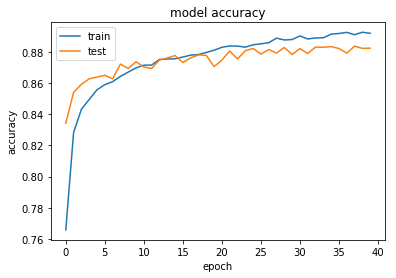

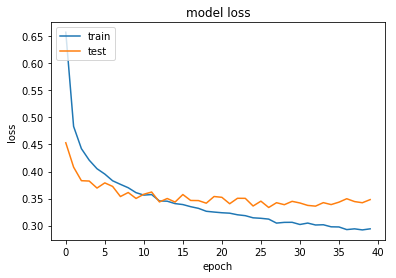

In [23]:
plt.plot(fit_model.history['acc'])
plt.plot(fit_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = y_test_raw
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

 9376/10000 [===========================>..] - ETA: 0s

In [25]:
from sklearn.metrics import classification_report
num_classes=10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.81      0.87      0.84      1000
    Class 1       0.99      0.96      0.98      1000
    Class 2       0.77      0.83      0.80      1000
    Class 3       0.87      0.90      0.89      1000
    Class 4       0.75      0.82      0.79      1000
    Class 5       0.97      0.96      0.97      1000
    Class 6       0.79      0.58      0.67      1000
    Class 7       0.93      0.97      0.95      1000
    Class 8       0.97      0.98      0.97      1000
    Class 9       0.98      0.94      0.96      1000

avg / total       0.88      0.88      0.88     10000



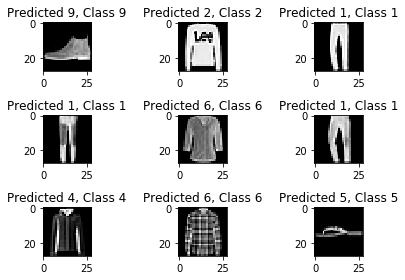

In [26]:
for i, corr in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[corr].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[corr], y_true[corr]))
    plt.tight_layout()

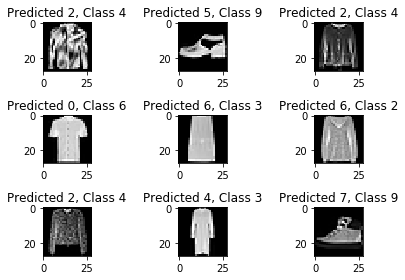

In [29]:
for i, incorr in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorr].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorr], y_true[incorr]))
    plt.tight_layout()